## Proyecto de Ciencia de Datos MDS7201

# MINSAL Entidades 

Integrantes:   
- Camilo Carvajal
- Daniel Carmona
- Martín Sepúlveda
- Monserrat Prado

# Librerías

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdown

from scipy import stats

from IPython.display import display, Markdown, Latex

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

import seaborn as sns
sns.set_theme(style='darkgrid')

import missingno as msno
import plotly.express as px

In [2]:
main_db = pd.read_csv('DATA_HLF_MDS_2.csv', sep=',').set_index('index')
main_db.info()
main_db.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1526557 entries, 0 to 1528636
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   PRES_FECHA            1526556 non-null  object 
 1   CODIGO                1526557 non-null  object 
 2   PATIENT_ID            1526557 non-null  int64  
 3   LINEA                 1526557 non-null  object 
 4   EPISCODE              1526557 non-null  object 
 5   CODESPECIALIDAD       1526556 non-null  object 
 6   ESPECIALIDAD          1526556 non-null  object 
 7   SALA                  1526508 non-null  object 
 8   CAMA                  1526556 non-null  object 
 9   AREA_KEY              1526556 non-null  object 
 10  DIAGCODE              687787 non-null   object 
 11  DIAGDESC              1526556 non-null  object 
 12  CODIGO_MEDICAMENTO    1508178 non-null  object 
 13  ESTADO_PRESCR         1526556 non-null  object 
 14  PRES_DENOMINACION     1489517 non-

(1526557, 20)

In [3]:
#main_db.loc[:,['CODIGO_MEDICAMENTO','PRES_DENOMINACION', 'RESUMEN', 'FORMA_FARMA', 'IND_ADMINISTRACION_1', 'IND_ADMINISTRACION_2']]
main_db.head()

,PRES_FECHA,CODIGO,PATIENT_ID,LINEA,EPISCODE,CODESPECIALIDAD,ESPECIALIDAD,SALA,CAMA,AREA_KEY,DIAGCODE,DIAGDESC,CODIGO_MEDICAMENTO,ESTADO_PRESCR,PRES_DENOMINACION,RESUMEN,FORMA_FARMA,IND_ADMINISTRACION_1,IND_ADMINISTRACION_2,MEDICO_ID
index,,,,,,,,,,,,,,,,,,,,
0,01/01/2015 10:09:13,AC00190082,870942,HOS,HOS1410520140007798,A-4-72002,Cirugía Adulto,355,355-01 - Adultos Neurologica,HOS,K800,Calculo de la vesicula biliar con colecistitis...,FAJJ01015,Pasivo,NaN,1 COMPRIMIDO ORAL cada 12 horas durante 7 dias,NaN,NaN,NaN,996441.0
1,01/01/2015 10:09:40,AC00190082,870942,HOS,HOS1410520140007798,A-4-72002,Cirugía Adulto,355,355-01 - Adultos Neurologica,HOS,K800,Calculo de la vesicula biliar con colecistitis...,FANN02016,Pasivo,PARACETAMOL 500 MG COMPRIMIDO,1 COMPRIMIDO ORAL cada 6 horas durante 3 dias,comprimido,NaN,NaN,996441.0
2,01/01/2015 10:10:12,AC00190082,870942,HOS,HOS1410520140007798,A-4-72002,Cirugía Adulto,355,355-01 - Adultos Neurologica,HOS,K800,Calculo de la vesicula biliar con colecistitis...,FAMM01012,Pasivo,KETOROLACO 10 MG COMPRIMIDO,1 COMPRIMIDO ORAL cada 8 horas durante 3 dias,comprimido recubierto,NaN,NaN,996441.0
3,01/01/2015 10:22:04,AC00190165,831285,HOS,HOS1410520140007814,A-4-72012,Cirugía Abdominal Adulto,351,351-01 - UTAC Adulto,HOS,K35,Apendicitis aguda,FAMM01012,Activo,KETOROLACO 10 MG COMPRIMIDO,1 COMPRIMIDO ORAL cada 8 horas durante 5 dias,comprimido recubierto,NaN,NaN,996441.0
4,01/01/2015 10:22:37,AC00190165,831285,HOS,HOS1410520140007814,A-4-72012,Cirugía Abdominal Adulto,351,351-01 - UTAC Adulto,HOS,K35,Apendicitis aguda,FANN02016,Activo,PARACETAMOL 500 MG COMPRIMIDO,1 COMPRIMIDO ORAL cada 6 horas durante 3 dias,comprimido,NaN,NaN,996441.0


In [4]:
# pd.set_option('display.max_rows',None)

Forma_farma_unique = pd.DataFrame(main_db['FORMA_FARMA'].unique())
display(Forma_farma_unique)

,0
0,NaN
1,comprimido
2,comprimido recubierto
3,suspensión para inhalación
4,solución inyectable
...,...
82,solución para pulverización nasal
83,granulado para solución oral en sobre
84,gel bucal
85,solución para irrigación


In [5]:
ind_admin1_unique = pd.DataFrame(main_db['IND_ADMINISTRACION_1'].unique())
ind_admin2_unique = pd.DataFrame(main_db['IND_ADMINISTRACION_2'].unique())
display(ind_admin1_unique)
display(ind_admin2_unique)

,0
0,NaN
1,50mg/noche
2,0-0-2mg
3,100mg-100mg-300mg
4,"1,5mg-0-3mg"
...,...
8313,BIC 250CC + 3 GR METAMIZOL + 90 mg ketorolaco ...
8314,0-0-6
8315,0-0-3 + 1/2 SOS
8316,240mg-0-0 por 5 dias


,0
0,NaN
1,2CC BERODUAL + 2CC SF 0.9
2,admimnistrar al 0.45%
3,40cc/hora + 2g kcl
4,ev diluido lento
...,...
175299,1/2 COMPRIMIDO PM
175300,Fentanilo 2000 ug en 100 cc de SF 0.9%
175301,SF 0.9% 250 CC + 4 GR METAMIZOL + 300 MG KETOP...
175302,Por GTT. Madre tiene medicamento


# Porcentaje de Valores NaN

<AxesSubplot: >

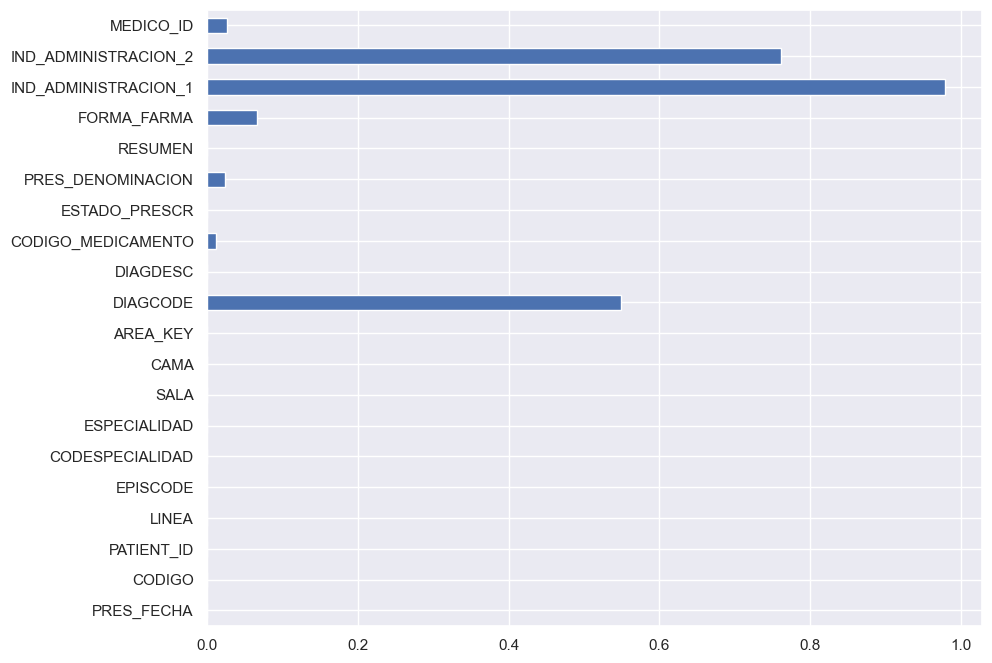

In [6]:
(main_db.isna().sum() / main_db.shape[0]).plot.barh(figsize=(10, 8))
#(main_db.isna().sum()).plot.barh(figsize=(6, 30))

In [ ]:
fig, ax = plt.subplots()
bars = ax.barh(main_db.isna().sum() / main_db.shape[0])

ax.bar_label(bars) 
for bars in ax.containers:
    ax.bar_label(bars)

# Analisis Univariado

In [7]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns={"index": serie.name, serie.name: "Count"})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

In [14]:
profile_serie(main_db['CODIGO_MEDICAMENTO'])

## CODIGO_MEDICAMENTO Profile

Type                              object
Number of observations           1508178
Unique                               770
Top                            FANN02016
Freq                              110494
                                        
Missing cells                      18379
Missing cells (%)                  1.2 %
Duplicate rows                   1526537
Duplicate rows (%)               100.0 %
Total size in memory      24424912 bytes
dtype: object

In [20]:
profile_serie(main_db['DIAGCODE'])

## DIAGCODE Profile

Type                              object
Number of observations            687787
Unique                              2784
Top                                 U071
Freq                               45790
                                        
Missing cells                     838770
Missing cells (%)                54.95 %
Duplicate rows                   1526483
Duplicate rows (%)               100.0 %
Total size in memory      24424912 bytes
dtype: object

In [16]:
profile_serie(main_db['CODESPECIALIDAD'])

## CODESPECIALIDAD Profile

Type                              object
Number of observations           1526556
Unique                                66
Top                            A-4-71002
Freq                              682666
                                        
Missing cells                          1
Missing cells (%)                  0.0 %
Duplicate rows                   1526556
Duplicate rows (%)               100.0 %
Total size in memory      24424912 bytes
dtype: object

In [17]:
profile_serie(main_db['MEDICO_ID'])

## MEDICO_ID Profile

Type                             float64
Number of observations         1485986.0
Mean                       535485.277823
Std                         251673.33822
Min                             100261.0
25%                             323633.0
50%                             533885.0
75%                             746640.0
Max                             999619.0
Negative                               0
Negative (%)                       0.0 %
Zeros                                  0
Zeros (%)                          0.0 %
Kurt                           -1.162181
Skew                            0.038294
                                        
Missing cells                      40571
Missing cells (%)                 2.66 %
Duplicate rows                   1526504
Duplicate rows (%)               100.0 %
Total size in memory      24424912 bytes
dtype: object

In [18]:
profile_serie(main_db['DIAGDESC'])

## DIAGDESC Profile

Type                                            object
Number of observations                         1526556
Unique                                           32563
Top                       COVID-19, VIRUS IDENTIFICADO
Freq                                             45781
                                                      
Missing cells                                        1
Missing cells (%)                                0.0 %
Duplicate rows                                 1525234
Duplicate rows (%)                             99.91 %
Total size in memory                    24424912 bytes
dtype: object

In [21]:
profile_serie(main_db['ESPECIALIDAD'])

## ESPECIALIDAD Profile

Type                                object
Number of observations             1526556
Unique                                  66
Top                       Medicina Interna
Freq                                682666
                                          
Missing cells                            1
Missing cells (%)                    0.0 %
Duplicate rows                     1526556
Duplicate rows (%)                 100.0 %
Total size in memory        24424912 bytes
dtype: object

# Analisis Multivariado

In [8]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df.corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

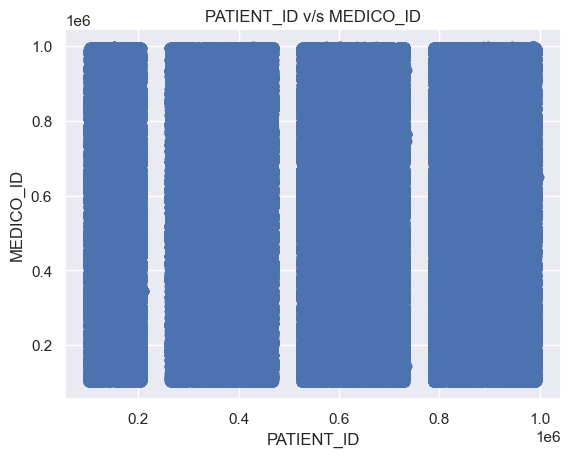

## Correlation:

C:\Users\Daniel\AppData\Local\Temp\ipykernel_13248\1966549970.py:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig_corr = px.imshow(df.corr())


## Missing Matrix:

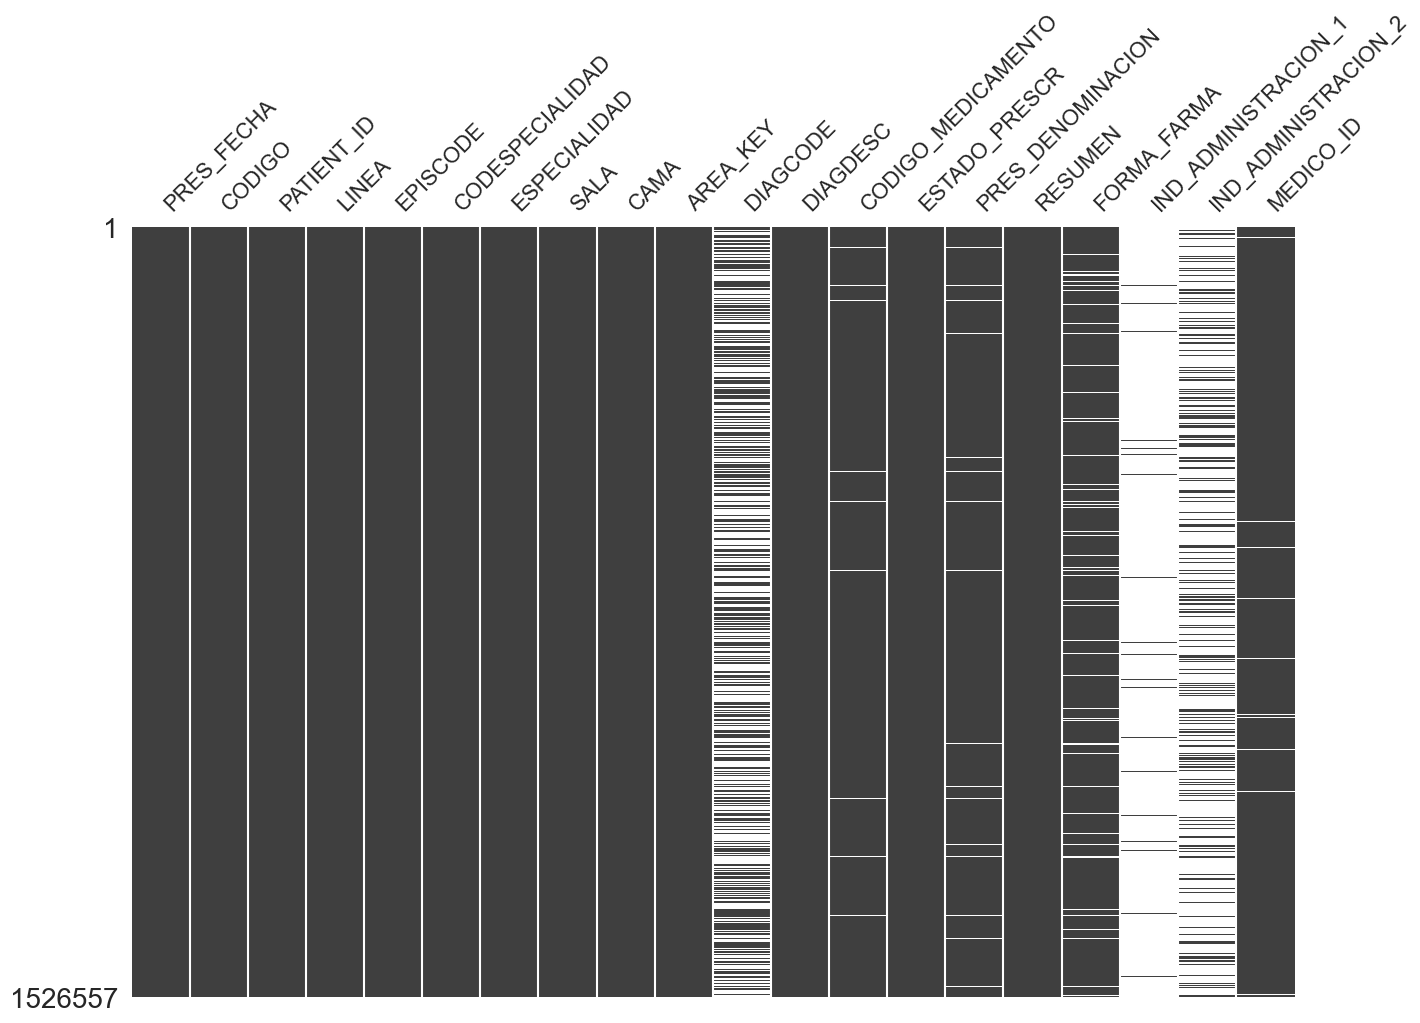

In [13]:
profile_df(main_db)